# **CEO and CMO based dataset**

# Importing libraries
Pandas ---> for preprocessing 

Matplotlib ---> for visualization


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/datasets/Online Retail.xlsx")

# From a CEO perspective, four questions that could be asked

* What is the total revenue generated by each customer in each country over the given period?

* What are the top-selling products by quantity and revenue?

* Are there any trends in customer purchase behavior by month or season?

* What is the percentage of repeat customers, and what is the lifetime value of each customer?

 1.**What is the total revenue generated by each customer in each country over the given period?**

In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
data.duplicated().value_counts()

False    536641
True       5268
dtype: int64

In [ ]:
data[(data['Quantity']==0) | (data['UnitPrice']==0)].value_counts().sum()

40

In [ ]:
# Drop rows with 0 values in Quantity or UnitPrice column
data = data[(data['Quantity'] != 0) & (data['UnitPrice'] != 0)]

# Reset the index after dropping rows
data.reset_index(drop=True, inplace=True)

In [ ]:
# Drop rows with null values in CustomerID and Description columns
data = data.dropna(subset=['CustomerID', 'Description'])

# Create a new column for total cost
data['TotalCost'] = data['Quantity'] * data['UnitPrice']

# Group the data by CustomerID and Country and calculate the total revenue generated by each customer in each country
revenue = data.groupby(['CustomerID', 'Country'])['TotalCost'].sum().reset_index()
# Print the results
revenue.head(10).sort_values(by='TotalCost',ascending= True)


<ipython-input-9-5ab3ed4f69b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalCost'] = data['Quantity'] * data['UnitPrice']


,CustomerID,Country,TotalCost
0,12346.0,United Kingdom,0.00
6,12353.0,Bahrain,89.00
4,12350.0,Norway,334.40
8,12355.0,Bahrain,459.40
7,12354.0,Spain,1079.40
5,12352.0,Norway,1545.41
3,12349.0,Italy,1757.55
2,12348.0,Finland,1797.24
9,12356.0,Portugal,2811.43
1,12347.0,Iceland,4310.00


2. **What are the top-selling products by quantity and revenue?**

In [ ]:
# Group the data by StockCode and Description and calculate the total quantity and revenue generated for each product
product_sales = data.groupby(['StockCode', 'Description']).agg({'Quantity': 'sum', 'TotalCost': 'sum'}).reset_index()

# Sort the data by Quantity and TotalCost in descending order and print the top-selling products by quantity and revenue
top_products_quantity = product_sales.sort_values(by='Quantity', ascending=False).head()
top_products_revenue = product_sales.sort_values(by='TotalCost', ascending=False).head()

print('Top-selling products by quantity:')
print("-"*50)
print(top_products_quantity)
print("\n") # for new line 
print('Top-selling products by revenue:')
print("-"*50)
print(top_products_revenue)

Top-selling products by quantity:
--------------------------------------------------
     StockCode                         Description  Quantity  TotalCost
2712     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215   13332.33
3586    85099B             JUMBO BAG RED RETROSPOT     45066   83236.76
2818     84879       ASSORTED COLOUR BIRD ORNAMENT     35314   56499.22
3593    85123A  WHITE HANGING HEART T-LIGHT HOLDER     34147   93823.85
361      21212     PACK OF 72 RETROSPOT CAKE CASES     33409   16247.95


Top-selling products by revenue:
--------------------------------------------------
     StockCode                         Description  Quantity  TotalCost
1249     22423            REGENCY CAKESTAND 3 TIER     11545  132870.40
3593    85123A  WHITE HANGING HEART T-LIGHT HOLDER     34147   93823.85
3586    85099B             JUMBO BAG RED RETROSPOT     45066   83236.76
2613     47566                       PARTY BUNTING     15023   67687.53
3915      POST                       



```
`# This is formatted as code`
```

3. **Are there any trends in customer purchase behavior by month or season?**

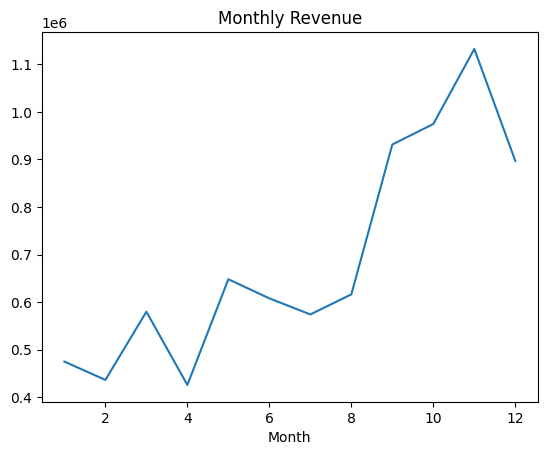

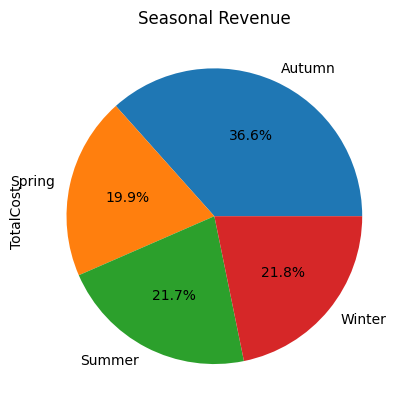

In [ ]:
# Convert InvoiceDate column to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Create new columns for month and season
data['Month'] = data['InvoiceDate'].dt.month
data['Season'] = pd.cut(data['Month'], bins=[0,2,5,8,11,12], labels=['Winter', 'Spring', 'Summer', 'Autumn', 'Winter'],ordered=False)

# Group the data by month and calculate the total revenue generated each month
monthly_revenue = data.groupby(['Month'])['TotalCost'].sum()

# Plot the results
monthly_revenue.plot(kind='line', title='Monthly Revenue')
plt.show()

# Group the data by season and calculate the total revenue generated each season
seasonal_revenue = data.groupby(['Season'])['TotalCost'].sum()

# Plot the results
seasonal_revenue.plot(kind='pie', title='Seasonal Revenue',autopct="%1.1f%%")

plt.show()

4. **What is the percentage of repeat customers, and what is the lifetime value of each customer?**

In [ ]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Month,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,Winter
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Winter


In [ ]:
# Count the number of unique customers
total_customers = len(data['CustomerID'].unique())
total_customers

4371

In [ ]:
# Count the number of customers who made more than one purchase
repeat_customers = data.groupby('CustomerID').filter(lambda x: len(x) > 1)
num_repeat_customers = len(repeat_customers['CustomerID'].unique())
num_repeat_customers

4293

In [ ]:
# Calculate the percentage of repeat customers
pct_repeat_customers = (num_repeat_customers / total_customers) * 100

print("Percentage of repeat customers: {:.2f}%".format(pct_repeat_customers))

Percentage of repeat customers: 98.22%


406711
Total orders by repeated customers 
------------------------------------------------------------


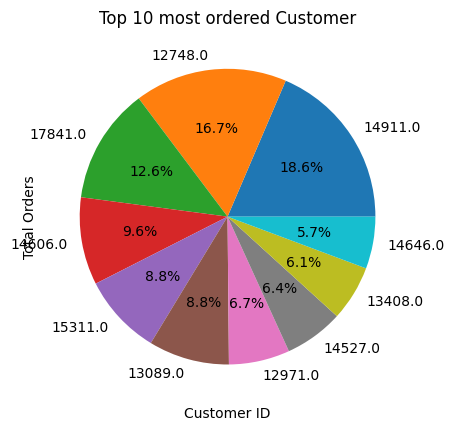

In [ ]:

print("Total orders by repeated customers ")
print("-"*60)
total_orders = repeat_customers.groupby(['CustomerID'])['InvoiceNo'].nunique().sort_values(ascending=False).head(10)
total_orders.plot.pie(autopct="%1.1f%%")
plt.title('Top 10 most ordered Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Orders')
plt.show()
# Create a countplot
# print(total_orders.sort_values(ascending = False))
# total_spent = repeat_customers.groupby(['CustomerID'])['TotalCost'].sum()

# repeat_customers_df = pd.concat([total_orders, total_spent], axis=1)
# repeat_customers_df.columns = ['TotalOrders', 'TotalSpent']
# repeat_customers_df['LifetimeValue'] = repeat_customers_df['TotalSpent'] / repeat_customers_df['TotalOrders']

# # percentage of repeat customers 
# repeat_customers_df['Pet_Of_Repeat_Cus'] = \
#  (repeat_customers_df.index.nunique() / data['CustomerID'].nunique()) * 100

# # print(repeat_customers_df['Pet_Of_Repeat_Cus'])
# data.head(2)

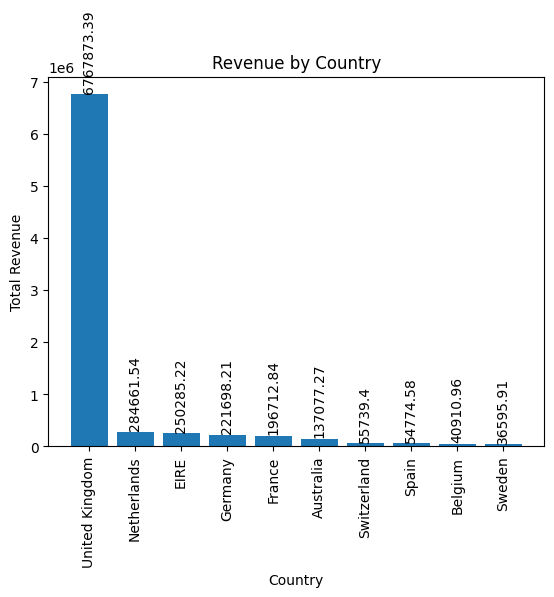

In [ ]:
# Total revenue by country

# sort the revenue by totalcost

revenue_country = revenue.groupby(['Country'])['TotalCost'].sum().sort_values(ascending=False).reset_index().head(10)
plot=plt.bar(revenue_country['Country'], revenue_country['TotalCost'])
plt.ylabel('Total Revenue')
plt.xlabel('Country')
plt.title('Revenue by Country')
plt.xticks(rotation=90)
for p in plot.patches:
  height=round(p.get_height(),2)
  plt.annotate(f"{height}",xy=(p.get_x()+p.get_width()/2,height),xytext=(0,1),
                 textcoords="offset points",ha='center', va='bottom',rotation=90)

plt.show()